In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kaggle


In [2]:
%run -i helper_functions.py

## Load cleaned data set

In [3]:
df = pd.read_csv('./output/cleaned_loan_data.csv', low_memory=False)


## Exploratory Data Analysis

In [4]:
# Print all unique values for each column
print_unique_values(df)

application_type: ['Individual' 'Joint App']
emp_length: ['4 years' '2 years' '10+ years' '3 years' '5 years' '6 years' '1 year'
 '7 years' '< 1 year' '9 years' '8 years' nan]
grade: ['B' 'A' 'C' 'D' 'E' 'F' 'G']
home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'NONE' 'OTHER' 'ANY']
inq_last_6mths: [1. 2. 0. 3. 4. 5. 6. 7. 8.]
loan_status: ['Current' 'Non-Current']
purpose: ['debt_consolidation' 'home_improvement' 'other' 'credit_card'
 'major_purchase' 'small_business' 'house' 'moving' 'medical' 'car'
 'vacation' 'renewable_energy' 'wedding' 'educational']
term: [36 60]
verification_status: ['Not Verified' 'Source Verified' 'Verified']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768043 entries, 0 to 2768042
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   addr_state            object 
 1   annual_inc            float64
 2   application_type      object 
 3   bc_util               float64
 4   dti                   float64
 5   emp_length            object 
 6   emp_title             object 
 7   fico_range_high       float64
 8   fico_range_low        float64
 9   grade                 object 
 10  home_ownership        object 
 11  inq_fi                float64
 12  inq_last_12m          float64
 13  inq_last_6mths        float64
 14  installment           float64
 15  int_rate              float64
 16  last_fico_range_high  float64
 17  last_fico_range_low   float64
 18  loan_amnt             float64
 19  loan_status           object 
 20  purpose               object 
 21  revol_util            float64
 22  term                  int64  
 23  verific

Number of unique values: 51


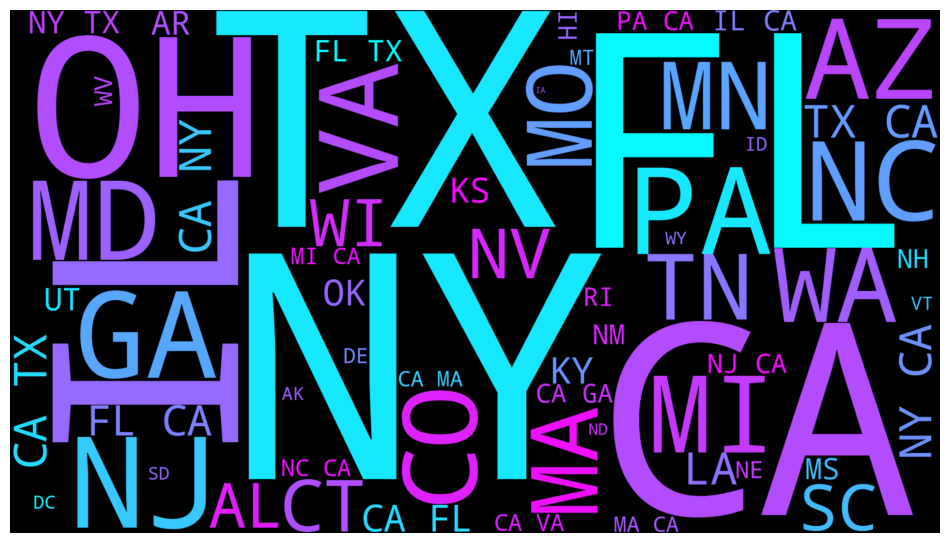

In [6]:
create_wordcloud(df['addr_state'])

### Employment Titles

Let's plot the wordcloud for employment titles

Number of unique values: 468030


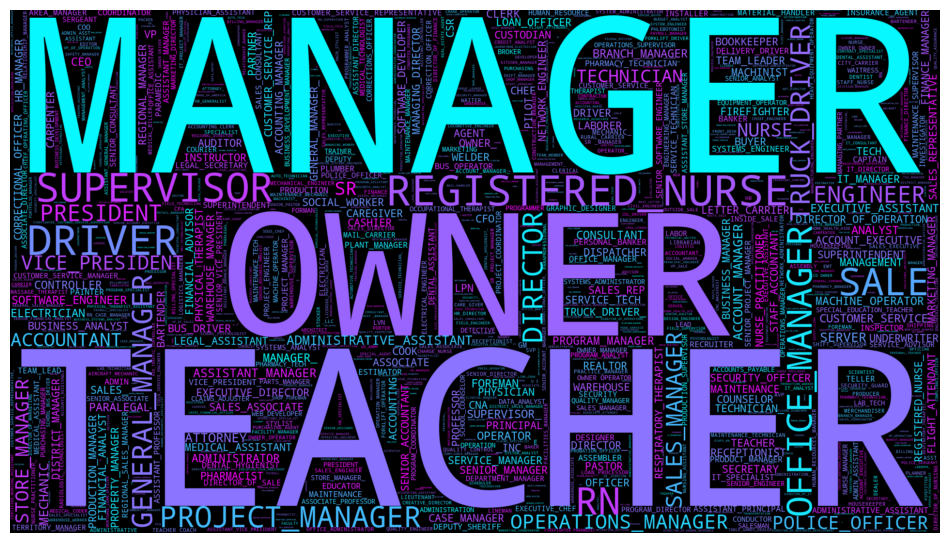

In [7]:
create_wordcloud(df['emp_title'])

#### Control the number of employee titles to work with

In [8]:
NUM_OF_TOP_EMP_TITLES = 20

In [9]:
top_emp_titles = df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index
df_top_emp_titles = df[df['emp_title'].isin(top_emp_titles)]

In [10]:
df_top_emp_titles.sample(10)

,addr_state,annual_inc,application_type,bc_util,dti,emp_length,emp_title,fico_range_high,fico_range_low,grade,...,installment,int_rate,last_fico_range_high,last_fico_range_low,loan_amnt,loan_status,purpose,revol_util,term,verification_status
1777591,FL,110700.0,Individual,97.8,32.10,2 years,PROJECT_MANAGER,689.0,685.0,C,...,780.20,19.12,679.0,675.0,30000.0,Current,debt_consolidation,85.2,60,Not Verified
1261263,OR,225000.0,Individual,93.8,18.31,10+ years,OWNER,699.0,695.0,B,...,628.52,12.40,699.0,695.0,28000.0,Current,debt_consolidation,92.3,60,Source Verified
299076,FL,70000.0,Individual,72.6,18.60,4 years,DRIVER,664.0,660.0,G,...,784.64,30.94,584.0,580.0,23825.0,Non-Current,debt_consolidation,71.3,60,Verified
2170422,TX,119000.0,Individual,31.6,15.64,8 years,PRESIDENT,709.0,705.0,A,...,777.55,7.49,754.0,750.0,25000.0,Current,credit_card,29.7,36,Source Verified
1134283,AZ,79992.0,Joint App,17.7,41.79,1 year,MANAGER,784.0,780.0,A,...,611.03,8.19,809.0,805.0,30000.0,Current,debt_consolidation,17.8,60,Source Verified
1400971,WA,36500.0,Individual,51.8,13.68,3 years,OFFICE_MANAGER,754.0,750.0,A,...,792.79,8.81,779.0,775.0,25000.0,Current,debt_consolidation,50.2,36,Not Verified
2729953,IL,140000.0,Individual,48.7,11.87,5 years,SALES_MANAGER,679.0,675.0,C,...,503.54,12.74,599.0,595.0,15000.0,Non-Current,home_improvement,48.7,36,Source Verified
426167,FL,80000.0,Individual,54.9,4.76,2 years,OFFICE_MANAGER,674.0,670.0,A,...,307.45,6.71,674.0,670.0,10000.0,Current,credit_card,43.3,36,Not Verified
1101858,WY,50000.0,Individual,67.5,22.44,10+ years,OWNER,719.0,715.0,C,...,567.69,14.74,694.0,690.0,24000.0,Current,credit_card,53.1,60,Source Verified
2340294,CA,53000.0,Individual,93.9,13.20,8 years,SUPERVISOR,719.0,715.0,C,...,334.99,13.99,719.0,715.0,14400.0,Current,debt_consolidation,89.2,60,Verified


In [11]:
df_top_emp_titles['emp_title'].value_counts()

emp_title
TEACHER               56357
MANAGER               51890
OWNER                 34015
REGISTERED_NURSE      26720
DRIVER                25738
SUPERVISOR            22063
SALES                 20562
RN                    19983
OFFICE_MANAGER        16572
PROJECT_MANAGER       15957
GENERAL_MANAGER       15191
TRUCK_DRIVER          14260
DIRECTOR              11475
PRESIDENT             10155
ENGINEER               9993
SALES_MANAGER          9602
OPERATIONS_MANAGER     9461
NURSE                  8461
POLICE_OFFICER         8314
STORE_MANAGER          7976
Name: count, dtype: int64

In [12]:
# Compute and print the mean loan amount for each of the top employment titles
print(df_top_emp_titles.groupby('emp_title')['loan_amnt'].mean().sort_values(ascending=False))

# Print the mean loan amount for df_top_emp_titles
print(f'Mean loan amount for top {NUM_OF_TOP_EMP_TITLES} employment titles: {df_top_emp_titles["loan_amnt"].mean()}')

emp_title
PRESIDENT             21579.975382
DIRECTOR              20299.786492
SALES_MANAGER         18138.507603
PROJECT_MANAGER       18080.049508
ENGINEER              17972.981087
GENERAL_MANAGER       17622.197354
POLICE_OFFICER        17513.648665
REGISTERED_NURSE      17329.533121
OPERATIONS_MANAGER    17222.006130
OWNER                 17199.357636
RN                    16904.184807
MANAGER               15888.822991
SALES                 15179.716224
STORE_MANAGER         15125.388666
NURSE                 15119.501241
TEACHER               15058.969161
TRUCK_DRIVER          15000.333100
SUPERVISOR            14782.273490
OFFICE_MANAGER        14250.543085
DRIVER                13973.605175
Name: loan_amnt, dtype: float64
Mean loan amount for top 20 employment titles: 16279.319180736931


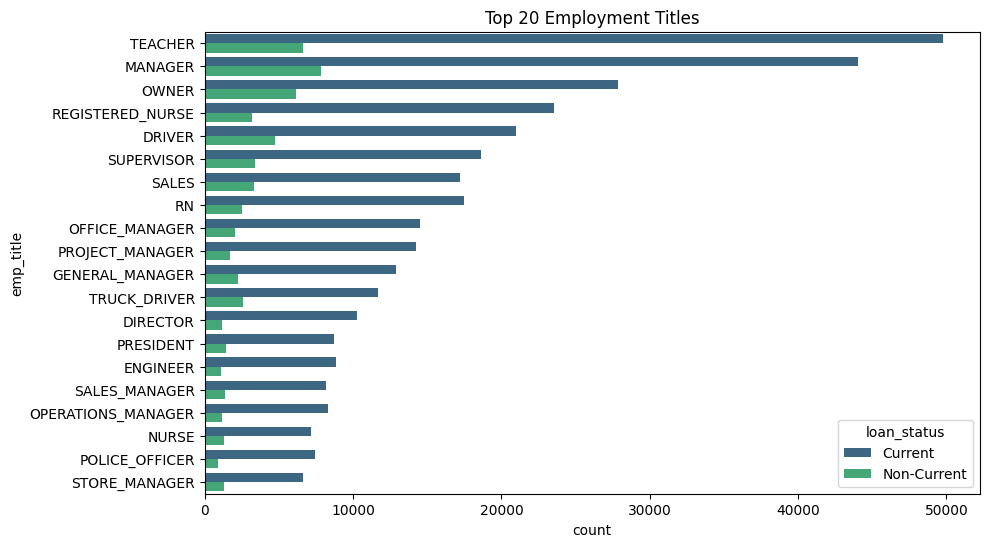

In [13]:
# Plot the top 'emp_title' values against loan_status
plt.figure(figsize=(10, 6))
#ax = sns.countplot(y='emp_title', data=df, order=df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index, hue='loan_status', palette='viridis')
ax = sns.countplot(y='emp_title', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index, hue='loan_status', palette='viridis')

#plt.xticks(rotation=90)
plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles')
plt.savefig('./output/emp_title_' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()


loan_status          Current  Non-Current     ratio
emp_title                                          
DIRECTOR            0.896993     0.103007  0.114835
DRIVER              0.816264     0.183736  0.225094
ENGINEER            0.886921     0.113079  0.127496
GENERAL_MANAGER     0.850240     0.149760  0.176138
MANAGER             0.848661     0.151339  0.178327
NURSE               0.848599     0.151401  0.178412
OFFICE_MANAGER      0.876840     0.123160  0.140458
OPERATIONS_MANAGER  0.877180     0.122820  0.140017
OWNER               0.818962     0.181038  0.221058
POLICE_OFFICER      0.891027     0.108973  0.122300
PRESIDENT           0.858887     0.141113  0.164297
PROJECT_MANAGER     0.891584     0.108416  0.121600
REGISTERED_NURSE    0.880726     0.119274  0.135427
RN                  0.875244     0.124756  0.142539
SALES               0.838586     0.161414  0.192484
SALES_MANAGER       0.855030     0.144970  0.169549
STORE_MANAGER       0.833124     0.166876  0.200301
SUPERVISOR  

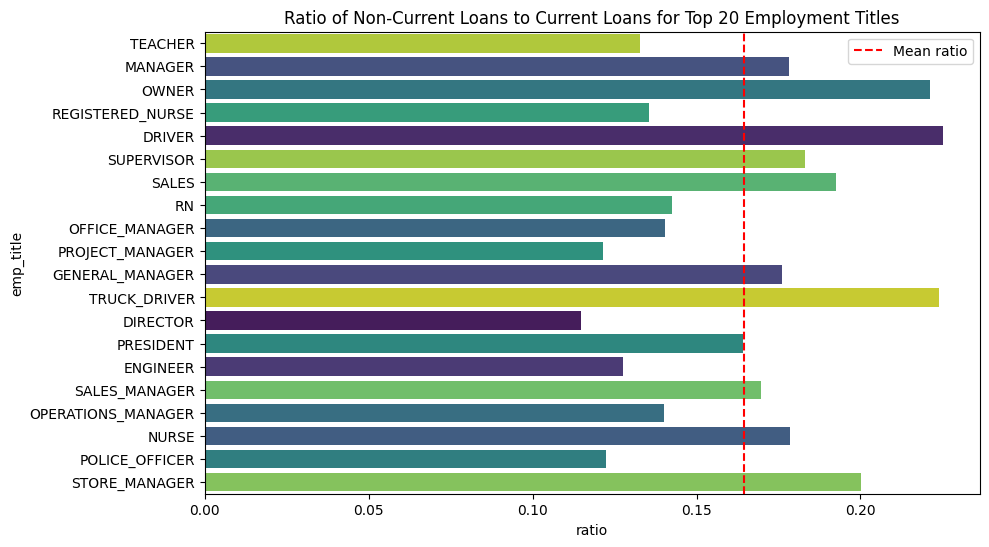

In [14]:
# Get the top 'emp_title' values, then compute the ratio of Non-Current loans to Current loans
#top_emp_title = df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index

#emp_title_ratio = df[df['emp_title'].isin(top_emp_title)].groupby('emp_title')['loan_status'].value_counts(normalize=True).unstack()
emp_title_ratio = df_top_emp_titles.groupby('emp_title')['loan_status'].value_counts(normalize=True).unstack()
emp_title_ratio['ratio'] = emp_title_ratio['Non-Current'] / emp_title_ratio['Current']
print(emp_title_ratio)

mean_ratio = emp_title_ratio['ratio'].mean()
print(f"Mean ratio: {mean_ratio}")

# Plot the ratio of Non-Current loans to Current loans for the top 10 'emp_title' values
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='ratio', 
    y=emp_title_ratio.index,
    hue=emp_title_ratio.index,
    data=emp_title_ratio,
    order=df_top_emp_titles['emp_title'].value_counts().index,
    palette='viridis')

# Add the mean ratio to the plot
plt.axvline(mean_ratio, color='red', linestyle='--', label='Mean ratio')
plt.legend()

plt.title('Ratio of Non-Current Loans to Current Loans for Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles')
plt.savefig('./output/emp_title_' + str(NUM_OF_TOP_EMP_TITLES) + '_ratio.png', dpi=300, bbox_inches='tight')
plt.show()


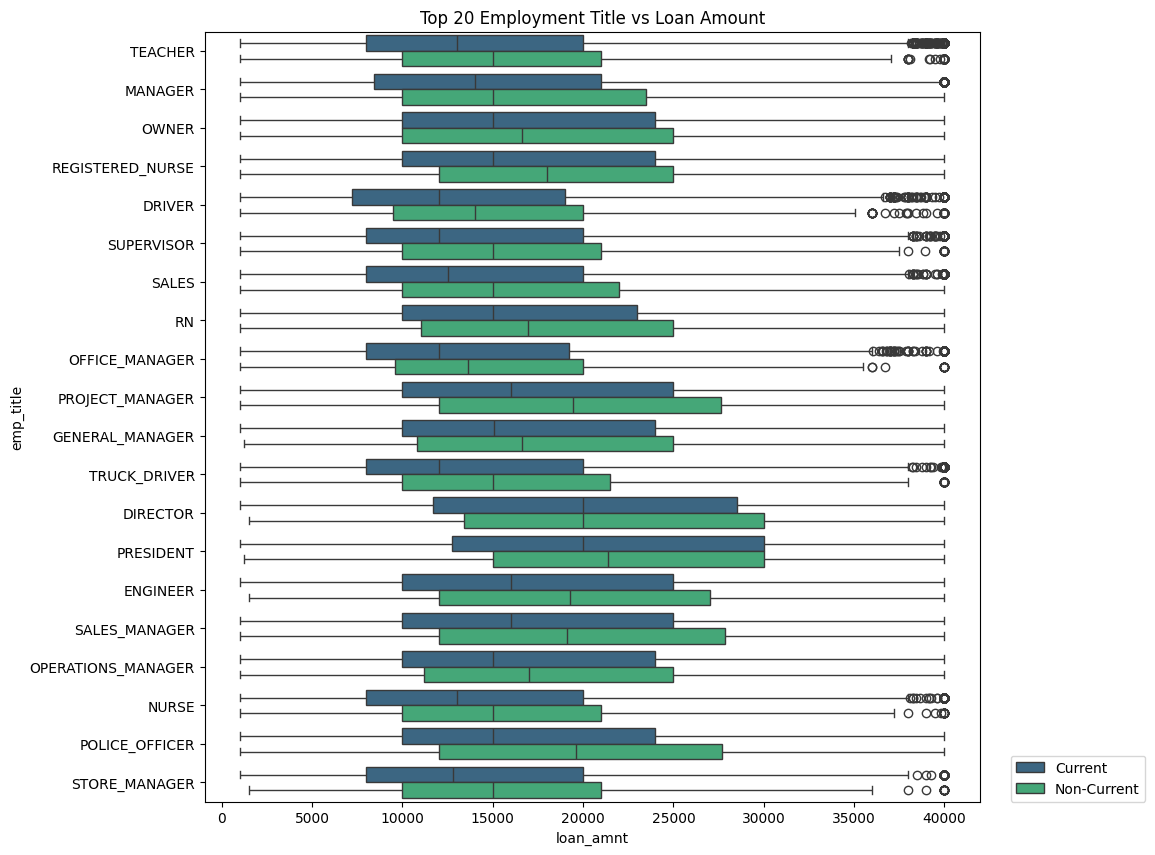

In [15]:
# Plot disitribution of top 'emp_title' against loan_amount
plt.figure(figsize=(10, 10))
sns.boxplot(x='loan_amnt', y='emp_title', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().index, hue='loan_status', palette='viridis')
plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Title vs Loan Amount')
plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_loan_amnt.png', dpi=300, bbox_inches='tight')
plt.show()


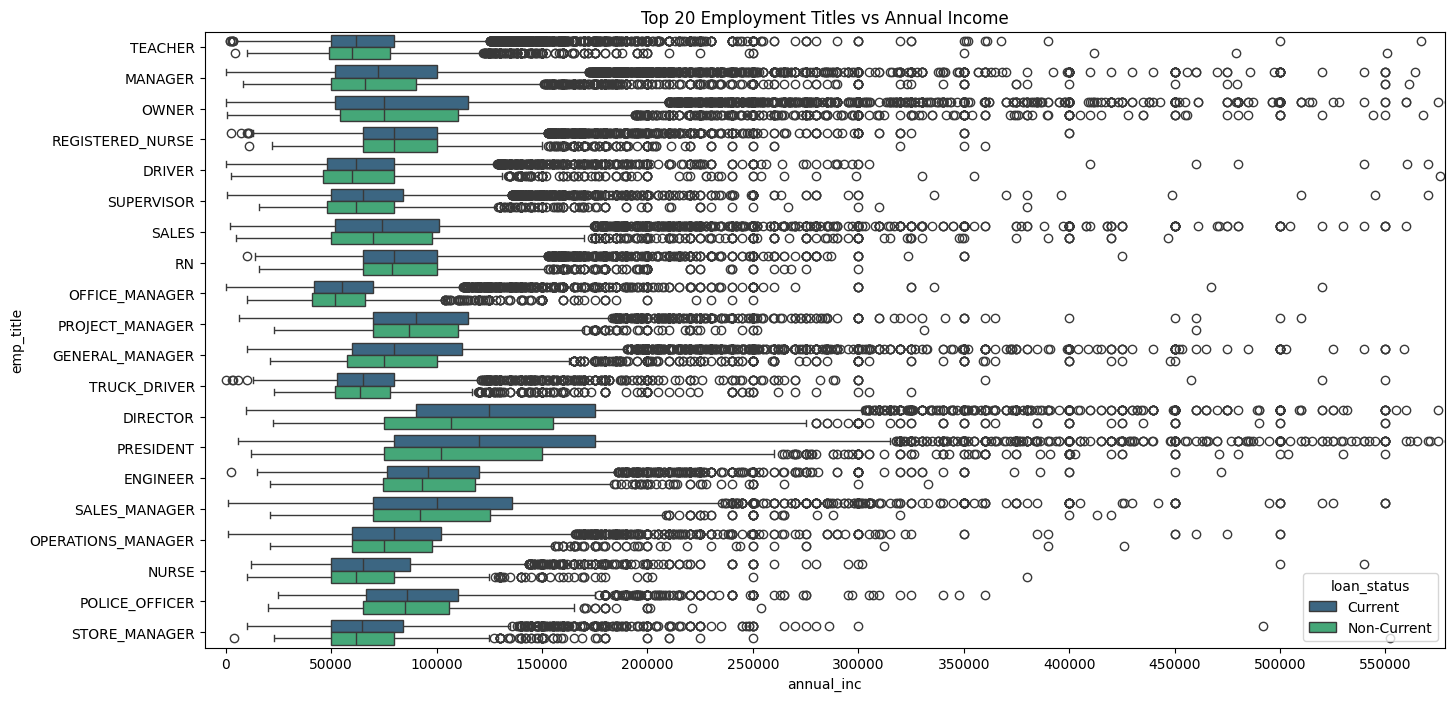

In [40]:
# Plot disitribution of top 'emp_title' against annual_inc
plt.figure(figsize=(16, 8))
sns.boxplot(x='annual_inc', y='emp_title', hue='loan_status', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().index, palette='viridis')
# Set the x-axis limit to $578,126 (starting for 37% tax bracket), adding padding to the left
plt.xlim(-10000, 578126)
plt.xticks(np.arange(0, 600000, 50000))

#plt.subplots_adjust(right=2)

plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles vs Annual Income')
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_annual_inc2.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Drop 'emp_title' column
#df.drop('emp_title', axis=1, inplace=True)

### Impute missing values

In [18]:
# Fill empty values with -1
df.fillna({'inq_fi': -1}, inplace=True)
df.fillna({'inq_last_12m': -1}, inplace=True)

#df_pruned['emp_length'].fillna(-1, inplace=True)

In [19]:
# print the percentage loan_status for each value in inq_fi
print_loan_status_percentage(df, 'inq_fi')


inq_fi = -1.0
loan_status
Current        0.820689
Non-Current    0.179311
Name: proportion, dtype: float64
----
inq_fi = 1.0
loan_status
Current        0.893663
Non-Current    0.106337
Name: proportion, dtype: float64
----
inq_fi = 0.0
loan_status
Current        0.890043
Non-Current    0.109957
Name: proportion, dtype: float64
----
inq_fi = 2.0
loan_status
Current        0.883103
Non-Current    0.116897
Name: proportion, dtype: float64
----
inq_fi = 3.0
loan_status
Current        0.87188
Non-Current    0.12812
Name: proportion, dtype: float64
----
inq_fi = 4.0
loan_status
Current        0.859592
Non-Current    0.140408
Name: proportion, dtype: float64
----
inq_fi = 5.0
loan_status
Current        0.84721
Non-Current    0.15279
Name: proportion, dtype: float64
----
inq_fi = 8.0
loan_status
Current        0.814738
Non-Current    0.185262
Name: proportion, dtype: float64
----
inq_fi = 6.0
loan_status
Current        0.834083
Non-Current    0.165917
Name: proportion, dtype: float64
----
inq_

Based on the distribution of loan_status for each value of inq_fi, we update inq_fi=-1 to be the value with the closest percentage of 'Current'.


In [20]:
# Set inq_fi = -1 to 1
df['inq_fi'] = df['inq_fi'].replace(-1, 6.0)

In [21]:
# print the percentage loan_status for each value in inq_last_12m
print_loan_status_percentage(df, 'inq_last_12m')

inq_last_12m = -1.0
loan_status
Current        0.820689
Non-Current    0.179311
Name: proportion, dtype: float64
----
inq_last_12m = 2.0
loan_status
Current        0.880312
Non-Current    0.119688
Name: proportion, dtype: float64
----
inq_last_12m = 1.0
loan_status
Current        0.896035
Non-Current    0.103965
Name: proportion, dtype: float64
----
inq_last_12m = 0.0
loan_status
Current        0.912081
Non-Current    0.087919
Name: proportion, dtype: float64
----
inq_last_12m = 5.0
loan_status
Current        0.851476
Non-Current    0.148524
Name: proportion, dtype: float64
----
inq_last_12m = 7.0
loan_status
Current        0.843393
Non-Current    0.156607
Name: proportion, dtype: float64
----
inq_last_12m = 4.0
loan_status
Current        0.858822
Non-Current    0.141178
Name: proportion, dtype: float64
----
inq_last_12m = 6.0
loan_status
Current        0.849088
Non-Current    0.150912
Name: proportion, dtype: float64
----
inq_last_12m = 3.0
loan_status
Current        0.866933
Non-Curr

We do the same for `inq_last_12m`

In [22]:
# Set inq_last_12m = -1 to 9.0
df['inq_last_12m'] = df['inq_last_12m'].replace(-1, 9.0)

### Handle `emp_length`

In [23]:
# Impute missing value for 'emp_length' based on the mode of 'emp_length'
df.fillna({'emp_length': df['emp_length'].mode()[0]}, inplace=True)

In [24]:
# Encode emp_length
df['emp_length'] = df['emp_length'].astype(str).replace(
    {
        '< 1 year': 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_76421/107039797.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length'] = df['emp_length'].astype(str).replace(


In [25]:
# change 'emp_length' to int
df['emp_length'] = df['emp_length'].astype(int)

In [26]:
# Binary encode 'application_type'
df['application_type'] = df['application_type'].astype(str).replace(
    {
        'Individual': 1,
        'Joint App': 0
    }
).infer_objects(copy=False)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_76421/3520989426.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['application_type'] = df['application_type'].astype(str).replace(


## Target encoding of categorical features
https://www.blog.trainindata.com/target-encoder-a-powerful-categorical-encoding-method/

### Encode loan `grade`

In [27]:
# Encode 'grade' to ordinal values
df['grade'] = df['grade'].astype(str).replace(
    {
        'A': 10,
        'B': 9,
        'C': 8,
        'D': 7,
        'E': 6,
        'F': 5,
        'G': 4
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_76421/3611672450.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['grade'] = df['grade'].astype(str).replace(


In [28]:
# Encode 'verification_status' to ordinal values
df['verification_status'] = df['verification_status'].astype(str).replace(
    {
        'Not Verified': 0,
        'Verified': 1,
        'Source Verified': 2
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_76421/480460318.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['verification_status'] = df['verification_status'].astype(str).replace(


In [29]:
# One hot encode 'home_ownership'
df = pd.get_dummies(df, columns=['home_ownership'])


In [30]:
# One hot encode 'purpose'
df = pd.get_dummies(df, columns=['purpose'])


In [31]:
# Binary encode 'loan_status'
df['loan_status'] = df['loan_status'].astype(str).replace(
    {
        'Current': 1,
        'Non-Current': 0
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_76421/1095054282.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status'] = df['loan_status'].astype(str).replace(


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768043 entries, 0 to 2768042
Data columns (total 42 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   addr_state                  object 
 1   annual_inc                  float64
 2   application_type            int64  
 3   bc_util                     float64
 4   dti                         float64
 5   emp_length                  int64  
 6   emp_title                   object 
 7   fico_range_high             float64
 8   fico_range_low              float64
 9   grade                       int64  
 10  inq_fi                      float64
 11  inq_last_12m                float64
 12  inq_last_6mths              float64
 13  installment                 float64
 14  int_rate                    float64
 15  last_fico_range_high        float64
 16  last_fico_range_low         float64
 17  loan_amnt                   float64
 18  loan_status                 int64  
 19  revol_util           

In [33]:
df['loan_status'].value_counts(normalize=True)

loan_status
1    0.866957
0    0.133043
Name: proportion, dtype: float64

## Save engineered data to disk

In [34]:
# Save the cleaned data to a new csv file
df.to_csv('./output/engineered_loan_data.csv', index=False)

### Sample a small percentage for exploration

In [35]:
# Sample 10% of the data while retaining the same distribution of loan_status
#df_sampled = df_pruned.sample(frac=0.05, replace=False, random_state=42, weights = df_pruned.groupby('loan_status')['loan_status'].transform('count'))
#df_sampled['loan_status'].value_counts(normalize=True)

df_sampled = df

In [36]:
df_sampled.shape

(2768043, 42)

In [37]:
skip_plot_features = [
    'acc_now_delinq',
    'emp_title',
    'sub_grade',
    'inq_fi',
    'inq_last_6mths',
    'inq_last_12m',
    'int_rate',
    'issue_d', 
    'last_credit_pull_d',
    'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl',
    'mort_acc',
    'revol_util'
]

Number of columns to plot: 42
Skipping emp_title
Skipping inq_fi
Skipping inq_last_12m
Skipping inq_last_6mths
Skipping int_rate
Skipping revol_util


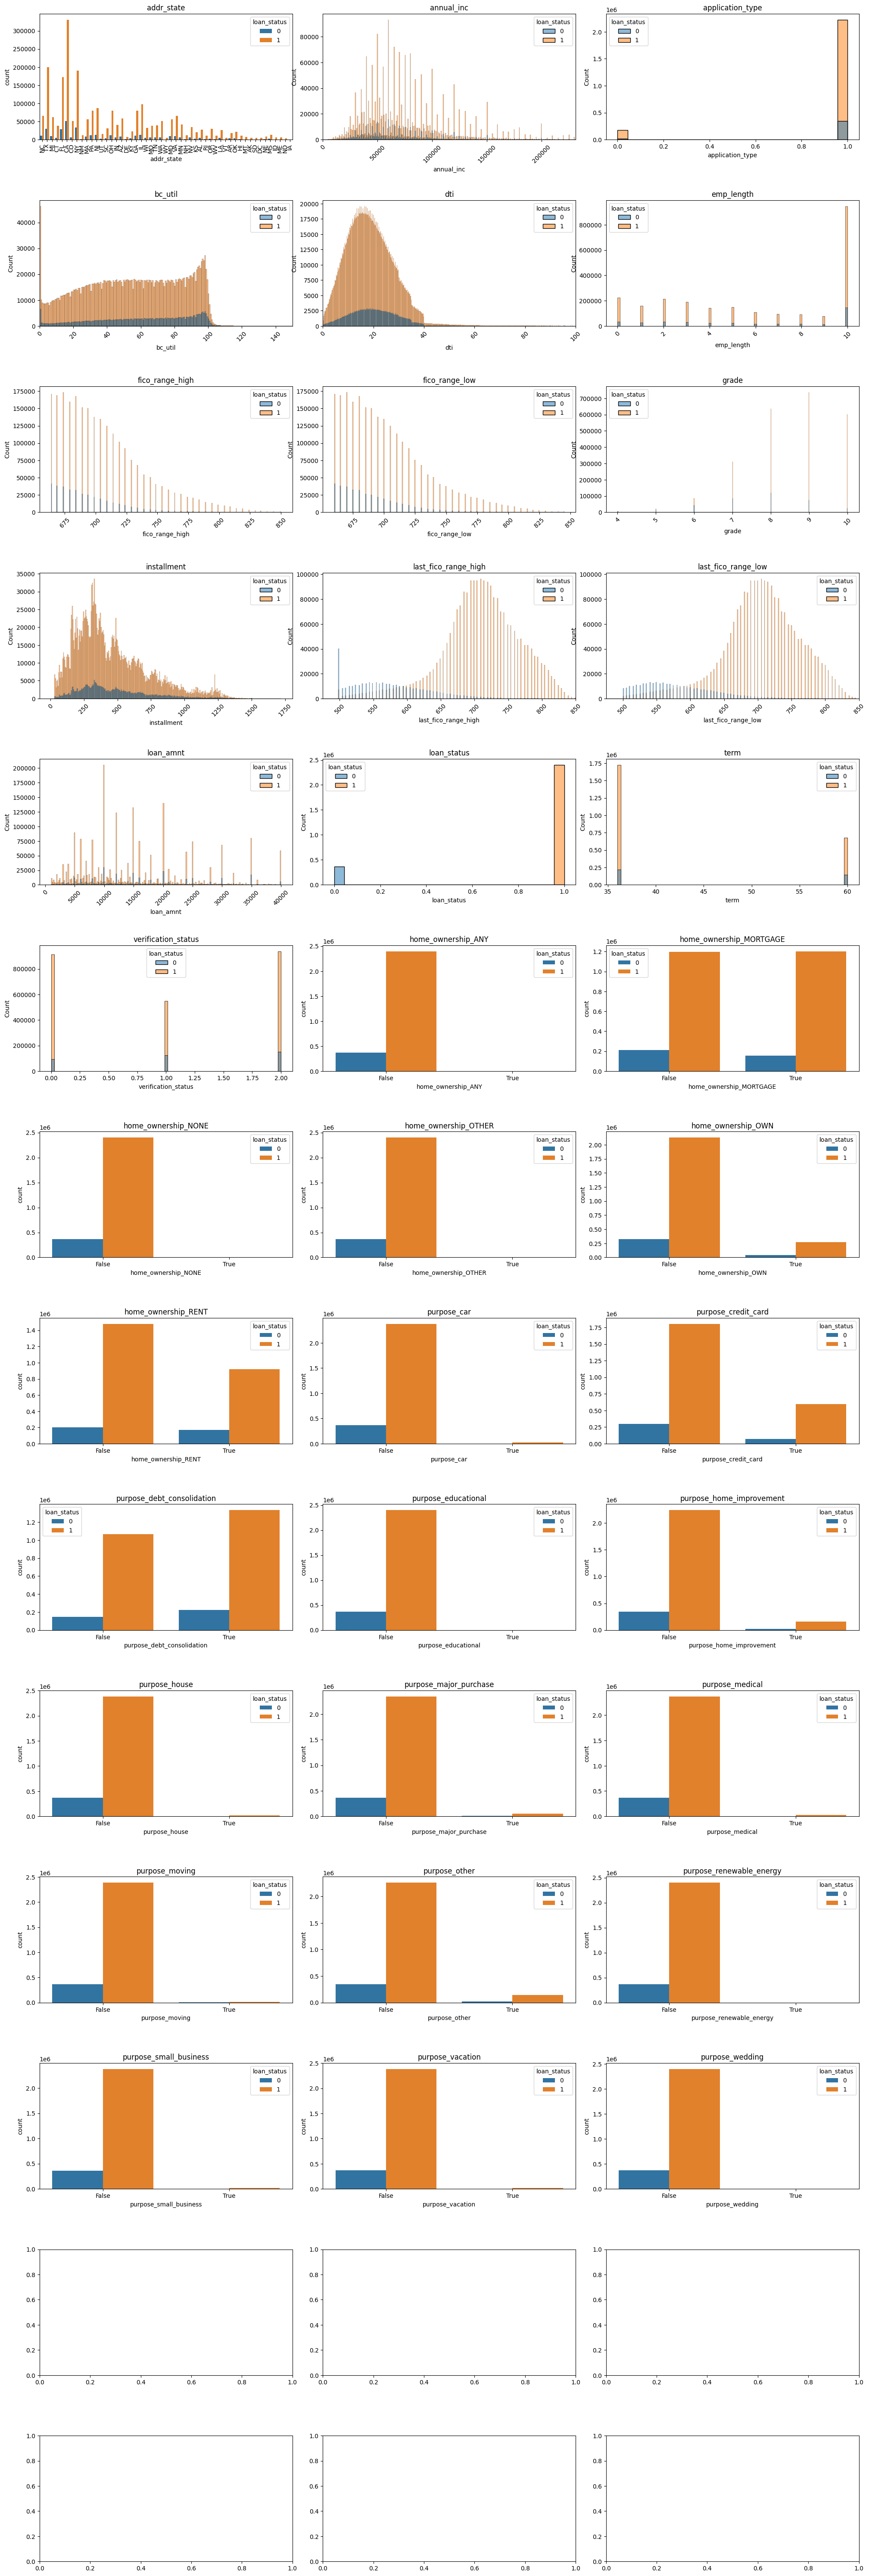

In [38]:
# Number of columns we will be plotting
n_cols = df_sampled.shape[1]
print(f'Number of columns to plot: {n_cols}')

# Create a grid of subplots with size (20, 60).  Grid should have 3 columns and the number of rows should be calculated based on the number of columns in the dataframe
plt.subplots(n_cols//3, 3,figsize=(20,60))

# Add margins between each subplot
plt.tight_layout(pad=2.0, h_pad=8.0, w_pad=2.0)

col_idx = 0

# Loop through each column in the dataframe
for col in df_sampled.columns:

    if col in skip_plot_features:
        print(f'Skipping {col}')
        continue

    # Plot in the ith position
    plt.subplot(n_cols//3, 3,col_idx+1)

    # if col is numeric
    if df_sampled[col].dtype in ['int64', 'float64']:
        if col == 'annual_inc':
            # Set the x-axis limit to $231,250 (35% tax bracket)
            plt.xlim(0, 231250)
        if col == 'bc_util':
            # Set the x-axis limit to 150%
            plt.xlim(0, 150)
        if col == 'dti':
            # Set the x-axis limit to 100%
            plt.xlim(0, 100)
        # if col has 'last_fico' in its name
        if 'last_fico' in col:
            # Set the x-axis limit to 850
            plt.xlim(475, 850)
        sns.histplot(x=df_sampled[col], hue=df_sampled['loan_status'])

    else:

        sns.countplot(x=col, hue='loan_status', data=df_sampled)
    
    # if col has more than 4 unique values
    if len(df_sampled[col].unique()) > 4:
        if col == 'addr_state':
            # Rotate the xticks
            plt.xticks(rotation=90)
        else:
            # Rotate the xticks
            plt.xticks(rotation=45)
        
    # Add a title to the plot
    plt.title(col)
    col_idx += 1

plt.savefig('./output/eda.png', dpi=300, bbox_inches='tight')
plt.show()

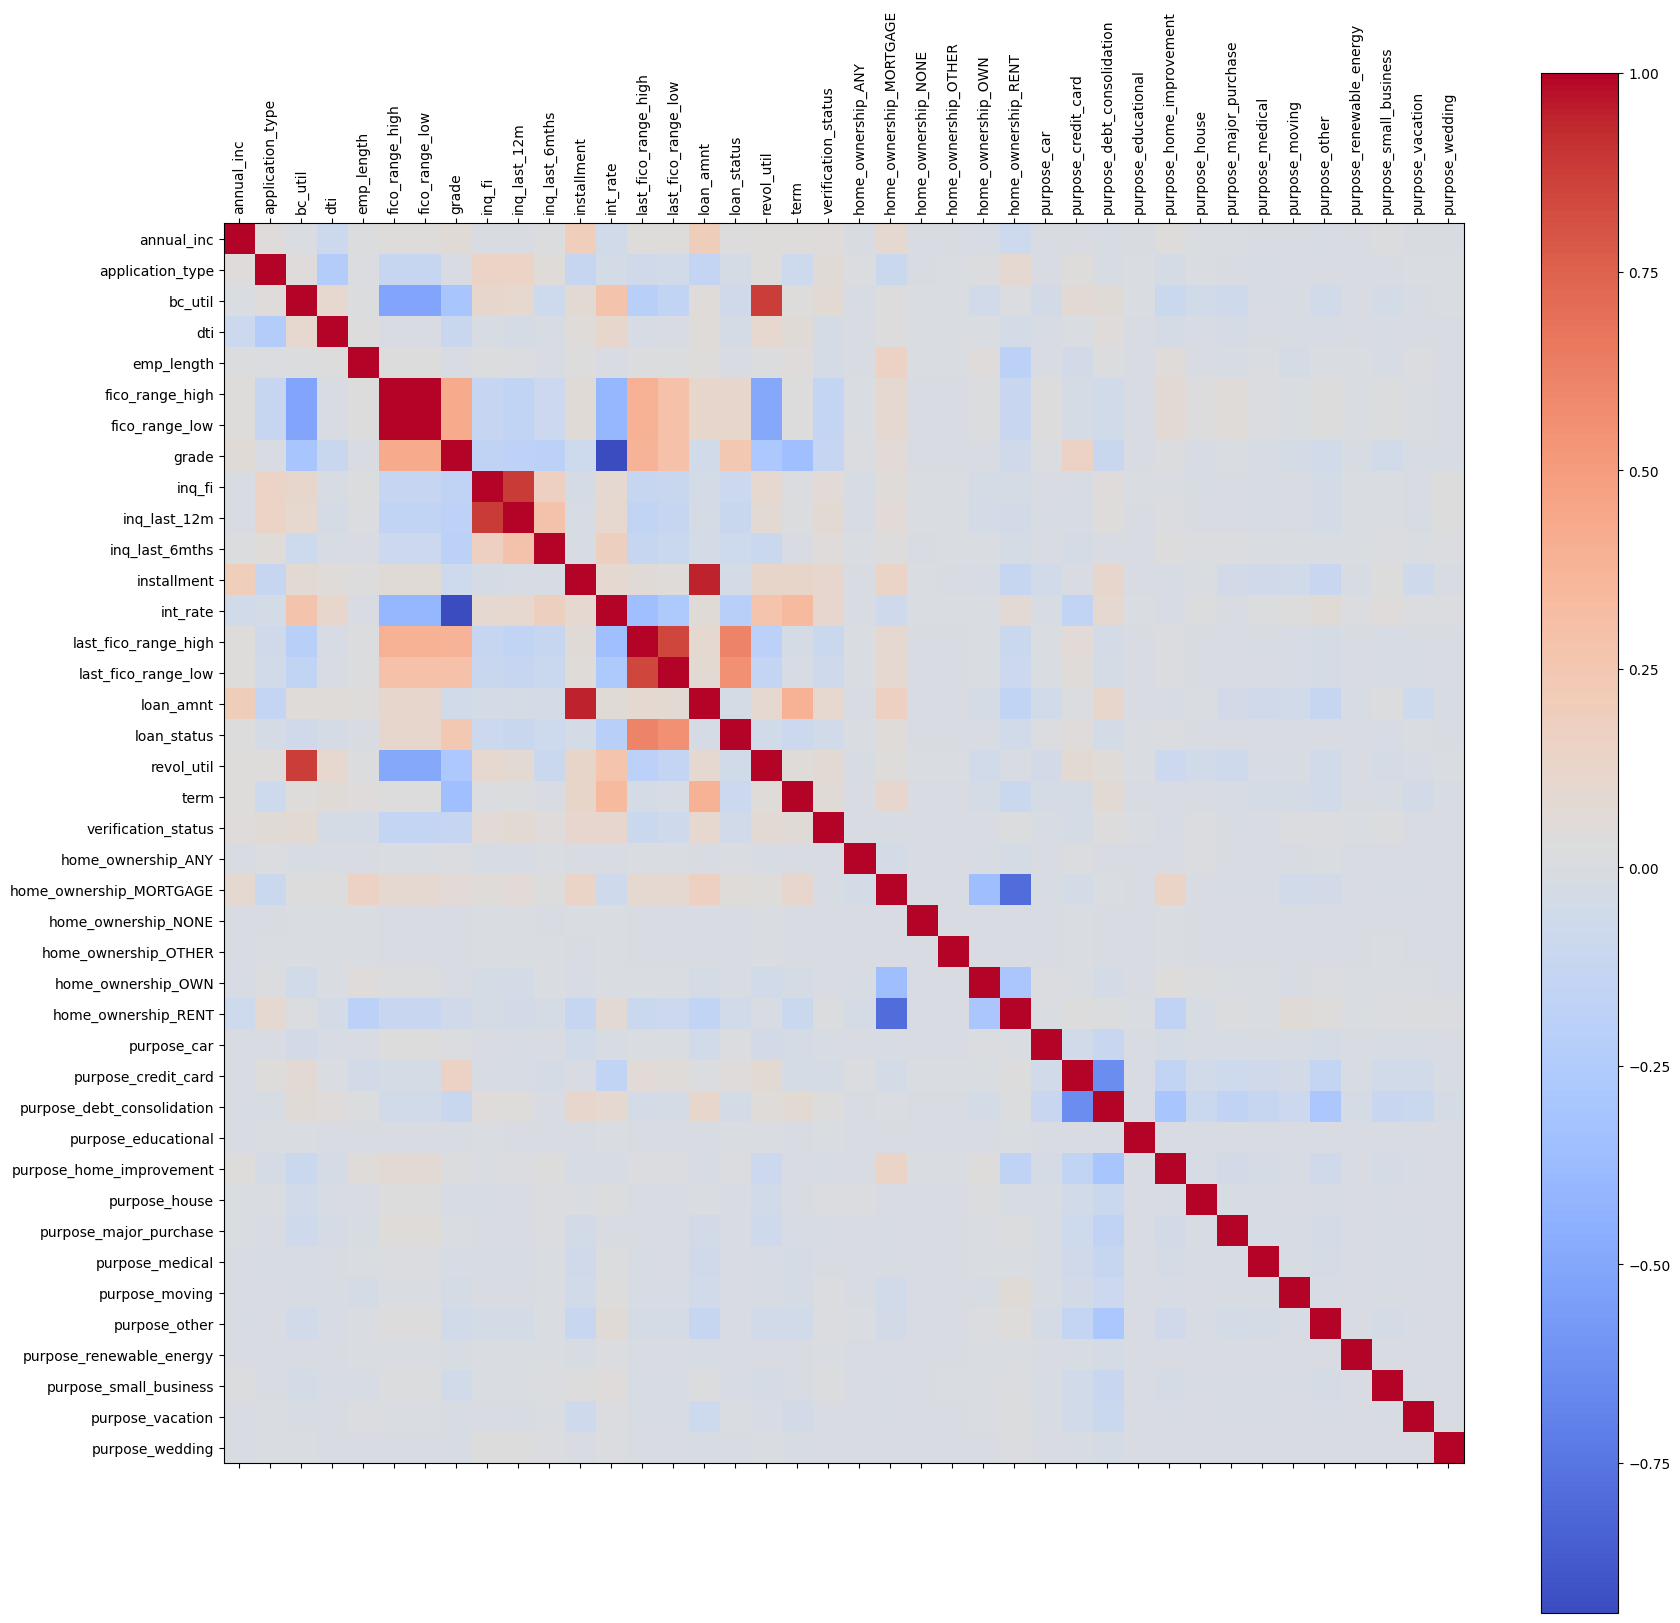

In [39]:
plot_corr(df_sampled.select_dtypes(include=['int64', 'float64', 'bool']), size=20)

#msk = loan_df['loan_status'].isin(['Fully Paid', 'Charged Off'])
#loan_df = loan_df[msk]

#cast issue_d column to datetime for later use
#loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])

#loan_df.to_pickle('../data/Pickle/loan_df0.pkl')

loan_df = pd.read_pickle('./data/Pickle/loan_df0.pkl').sample(frac=.05, random_state=0)

print('Total Number of Rows:', '{:,}'.format(loan_df.shape[0]))
print('Total Number of Columns:', '{:,}'.format(loan_df.shape[1]))